<a href="https://colab.research.google.com/github/aahahahaa/DAI-assignments/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [3]:
data = pd.read_csv('/content/tips (data for regression problem).csv')

print(data.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


The dataset provided contains information about restaurant bills and tips, which can be used to analyze the relationship between various factors influencing tipping behavior.It includes the following columns:

Total_bill: The total amount of the bill.

Tip: The tip amount given.

Sex: Gender of the customer (Male or Female).

Smoker: Indicates whether the customer is a smoker (Yes or No).

Day: The day of the week when the meal was served.

Time: The time of day (Lunch or Dinner).

Size: The size of the party.

This dataset is suitable for regression analysis to explore how different variables relate to the amount of tip given.

# **SCATTER PLOT**

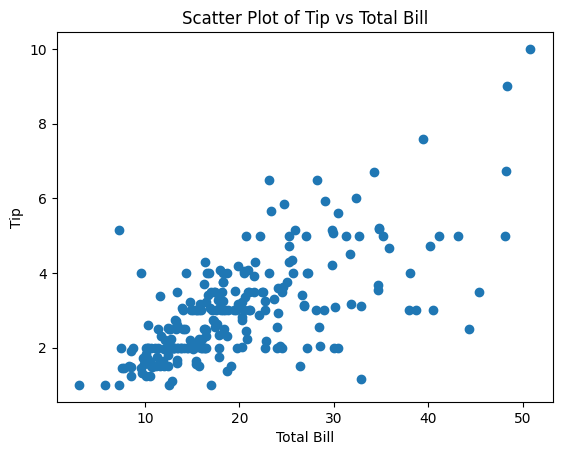

In [4]:
plt.scatter(data['total_bill'], data['tip'])
plt.title('Scatter Plot of Tip vs Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

The scatter plot of total_bill versus tip indicates a positive linear relationship between the two variables.

As the total bill amount increases, the tip amount also tends to increase, suggesting that customers generally tip more when their bills are higher.

# **PAIR PLOT**

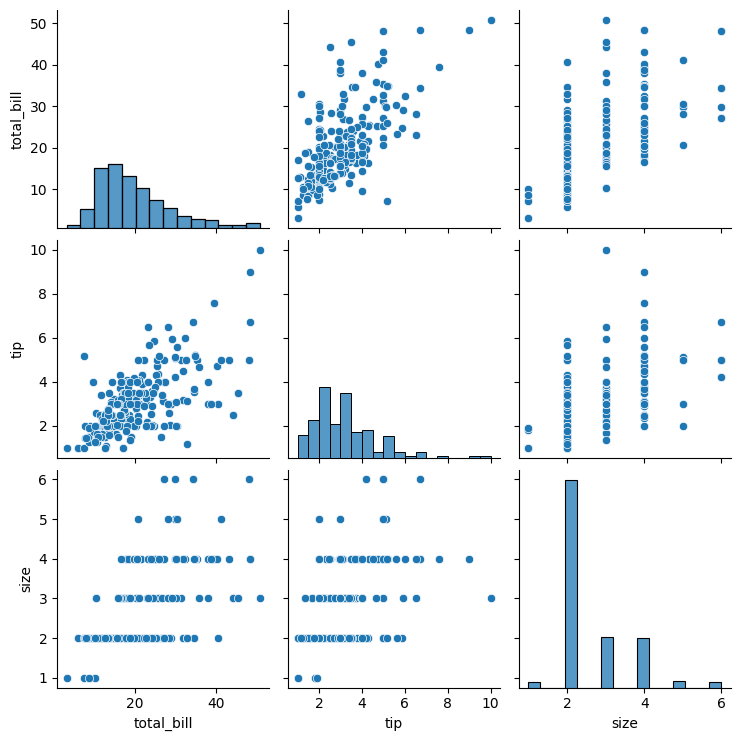

In [5]:
sns.pairplot(data)
plt.show()

The pairwise relationships, such as sex, smoker, and day, provide insights into how these factors may influence tipping behavior.

No linear relationship between them.

# **Correlation Matrix (Heatmap)**

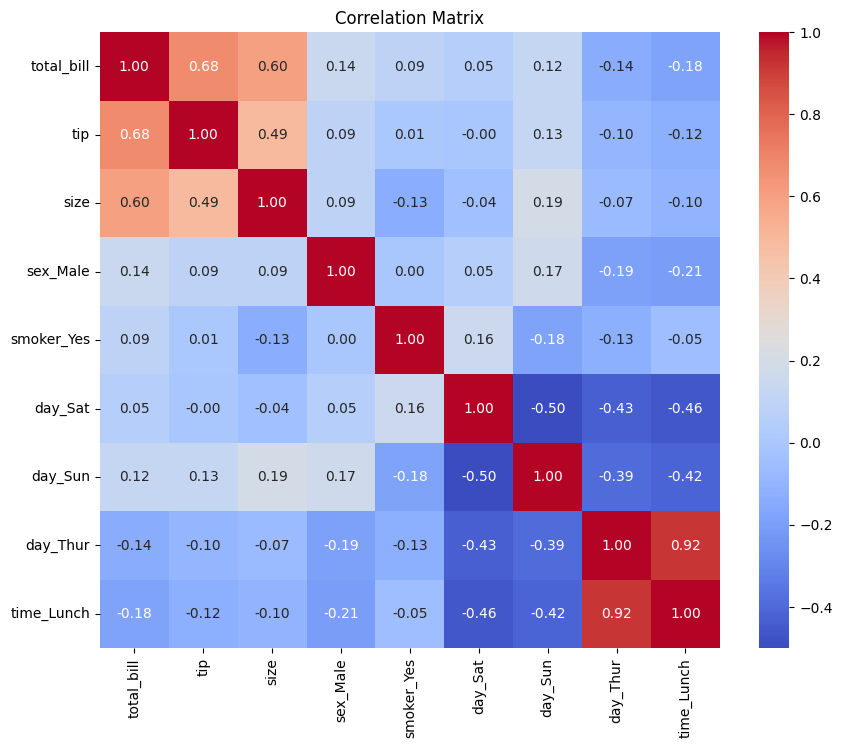

In [7]:
# Convert categorical variables to dummy/indicator variables
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

correlation_matrix = data_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The correlation matrix heatmap like the scatter plot, shows a strong positive correlation (close to 1) between total_bill and tip (approximately 0.67).

Other correlations are relatively weak,like size and categorical variables show weaker relationships.

# **Statistical Tests for Linearity (Rainbow Test)**

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           6.69e-34
Time:                        07:05:33   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9203      0.160      5.761      0.0

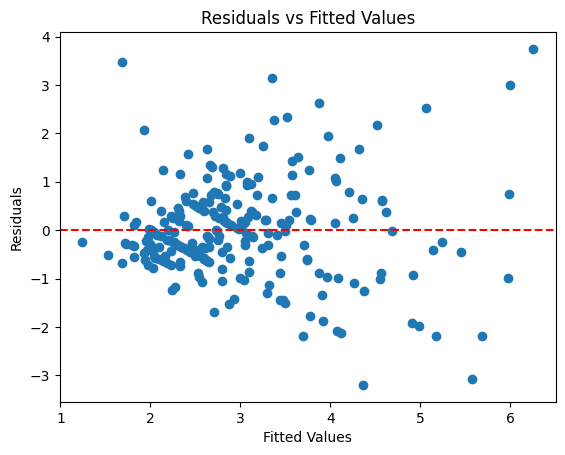

In [11]:
# Fit a linear model
model = smf.ols('tip ~ total_bill', data=data).fit()

# Check the summary of the model
print(model.summary())

# use the residuals and fitted values to perform a linearity test
residuals = model.resid
fitted = model.fittedvalues

plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

The residuals are randomly scattered around zero without any clear pattern therefore a linear model is appropriate for the data.

# **Line Plot (for Time-Series Data)**

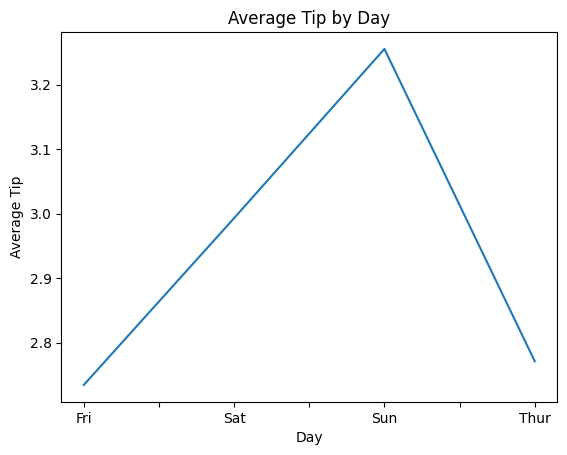

In [13]:
data.groupby('day')['tip'].mean().plot(kind='line')
plt.title('Average Tip by Day')
plt.xlabel('Day')
plt.ylabel('Average Tip')
plt.show()

Certain days like Sundays yield higher average tips.

# **Regression Method and Model Prediction Accuracy**

In [15]:
# Prepare data for regression
X = data[['total_bill']]
y = data['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predictions and evaluation
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}, R-squared: {r2}')

Mean Squared Error: 0.5688142529229536, R-squared: 0.5449381659234664


A high R-squared value indicates that changes in the bill are closely related to changes in the tip.

The Mean Squared Error (MSE) indicates how accurately our model predicts tips and the link between total bill and tip amounts.

In [17]:
data_encoded = pd.get_dummies(data, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Define features and target variable
X = data_encoded.drop('tip', axis=1)
y = data_encoded['tip']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regression": SVR(),
    "KNN": KNeighborsRegressor()
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'R-squared': r2}

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

                                MSE  R-squared
Linear Regression          0.703357   0.437302
Ridge Regression           0.700748   0.439389
Lasso Regression           0.566598   0.546712
Decision Tree              1.008435   0.193234
Random Forest              0.901146   0.279067
Support Vector Regression  0.532376   0.574089
KNN                        0.876373   0.298886


The analysis reveals that factors such as total bill amount, party size, and day of the week significantly impact tip amounts, with higher bills and larger parties generally leading to higher tips.

# **CONCLUSION**



Based on the analysis of significant factors and model performance,

**Focus on Total Bill:** Increase average bills through upselling strategies.

**Targeted Promotions:** Create promotions based on tipping patterns by day and time.

**Customer Preferences:** Tailor service based on insights from gender and smoking status.

**Training Staff:** Train staff to enhance customer experiences that lead to higher tips.

By implementing these strategies based on the regression analysis results, management can improve customer service and potentially increase overall revenue from tips.